In [1]:
from time import sleep
import csv

import pandas as pd
import numpy as np

import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as pyplot

#DATA_DIR = "/content/drive/MyDrive/2work/1Digital Advertising/1published_lectures/data"

In [2]:
#source: https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [3]:
!pip install --upgrade statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#we look through the docs for read_csv and find the "skip row" parameter
googletrends = pd.read_csv('multiTimeline.csv', skiprows = [0,1], parse_dates=['Week'])

In [5]:
googletrends.index = googletrends['Week']
del googletrends['Week']

In [6]:
googletrends.head()

,Macy's: (United States)
Week,
2013-10-13,19
2013-10-20,19
2013-10-27,18
2013-11-03,21
2013-11-10,24


In [7]:
#standard deviation is 12.69. Varies from 17 to 100.
print(googletrends["Macy's: (United States)"].describe())

count    260.000000
mean      29.992308
std       12.692987
min       17.000000
25%       19.000000
50%       30.000000
75%       34.000000
max      100.000000
Name: Macy's: (United States), dtype: float64


<Axes: xlabel='Week'>

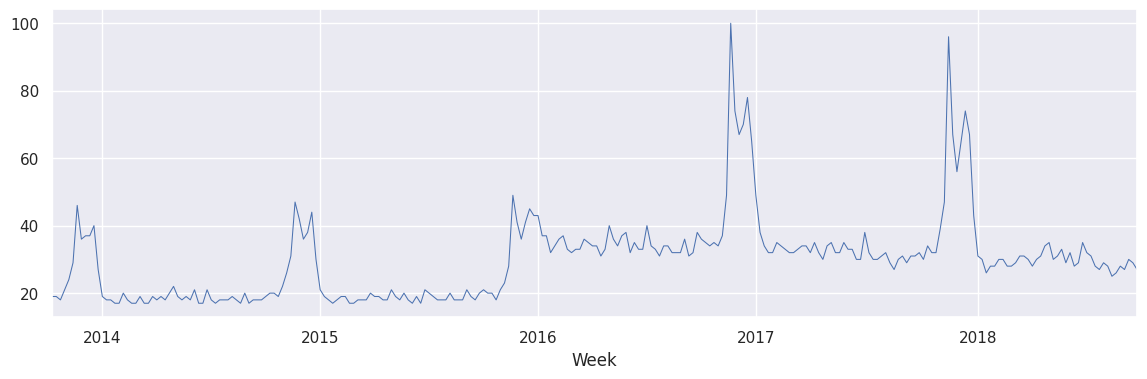

In [8]:
pd.plotting.register_matplotlib_converters()
sns.set(rc={'figure.figsize':(14, 4)})
googletrends["Macy's: (United States)"].plot(linewidth=0.75)

In [9]:
adf_test(googletrends["Macy's: (United States)"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.455739
p-value                          0.000236
#Lags Used                       5.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64


In [10]:
googletrends['trends_diff_1'] = googletrends["Macy's: (United States)"].diff(1)

In [11]:
googletrends

,Macy's: (United States),trends_diff_1
Week,,
2013-10-13,19,NaN
2013-10-20,19,0.0
2013-10-27,18,-1.0
2013-11-03,21,3.0
2013-11-10,24,3.0
...,...,...
2018-09-02,28,2.0
2018-09-09,27,-1.0
2018-09-16,30,3.0


<Axes: xlabel='Week'>

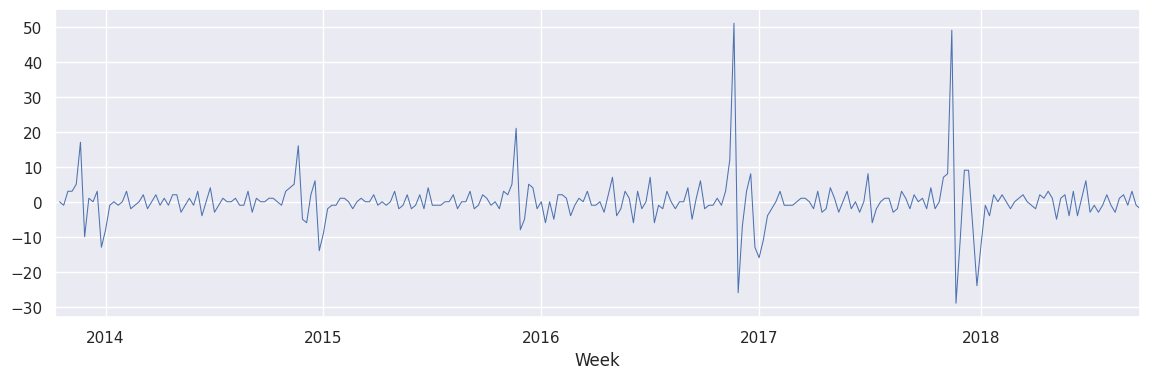

In [12]:
pd.plotting.register_matplotlib_converters()
sns.set(rc={'figure.figsize':(14, 4)})
googletrends['trends_diff_1'].plot(linewidth=0.75)

In [13]:
adf_test(googletrends['trends_diff_1'][1:])

Results of Dickey-Fuller Test:
Test Statistic                -7.692931e+00
p-value                        1.403584e-11
#Lags Used                     9.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


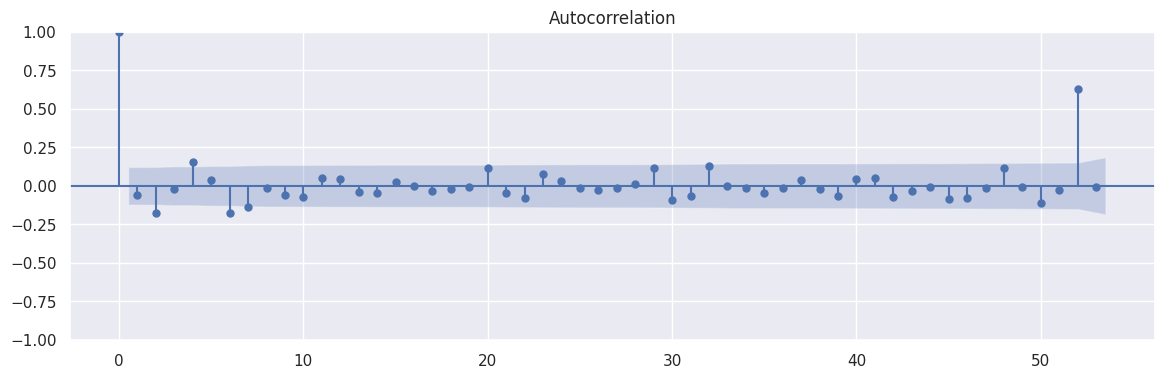

In [15]:
plot_acf(googletrends['trends_diff_1'][1:], lags=53);
#take 4,5 as the value

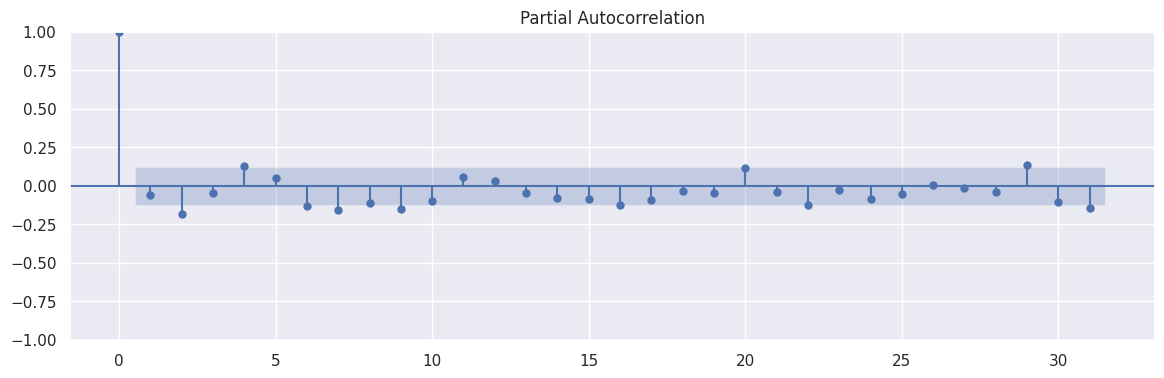

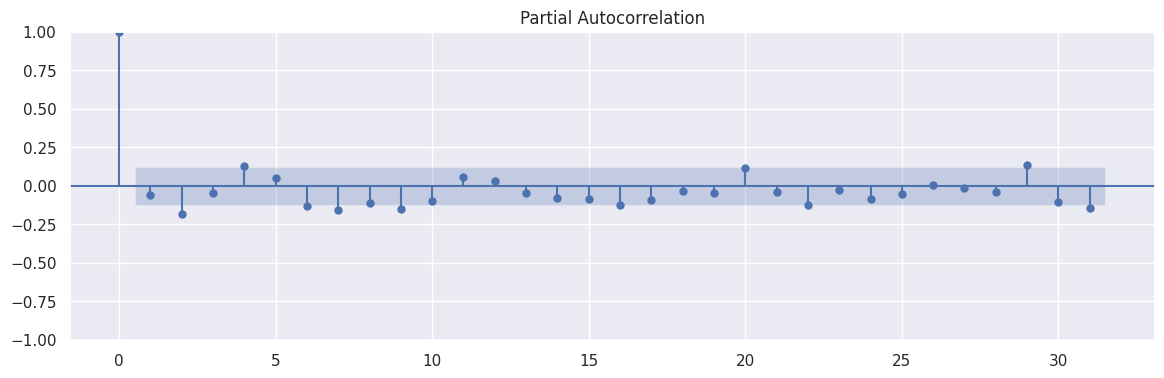

In [17]:
plot_pacf(googletrends['trends_diff_1'][1:], lags=31)
#take 3,4,5 as the values

**ARIMA Model**

In [18]:
import statsmodels
import matplotlib.pyplot as plt

In [19]:
model = ARIMA(googletrends["Macy's: (United States)"], order=(4,1,3))
model_fit = model.fit()
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

                                  SARIMAX Results                                  
Dep. Variable:     Macy's: (United States)   No. Observations:                  260
Model:                      ARIMA(4
 1
 3)   Log Likelihood                -842.299
Date:                     Mon
 01 May 2023   AIC                           1700.599
Time:                             02:47:46   BIC                           1729.053
Sample:                         10-13-2013   HQIC                          1712.039
                              - 09-30-2018                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9123      0.235      8.142      0.000       1.452       2.373
ar.L2         -1.8233      0.304     -6.000      0.000      -2.419      -1.228
ar.L3       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Load your time series data
data = googletrends["Macy's: (United States)"]

# Define the range of p, d, and q values to test
p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 5)

# Generate all possible combinations of p, d, and q values
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store the best model and its AIC
best_aic = np.inf
best_pdq = None
best_model = None

# Grid search
for pdq in pdq_combinations:
    try:
        # Create and fit an ARIMA model with the current combination of p, d, and q values
        model = ARIMA(data, order=pdq)
        model_fit = model.fit()

        # Calculate the AIC for the current model
        current_aic = model_fit.aic

        # Check if the current model's AIC is better (lower) than the best AIC found so far
        if current_aic < best_aic:
            best_aic = current_aic
            best_pdq = pdq
            best_model = model_fit
    except:
        # Ignore models that fail to converge or have other issues
        continue

# Print the best combination of hyperparameters and the corresponding AIC
print(f"Best ARIMA model: {best_pdq}, AIC: {best_aic}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  

Best ARIMA model: (3, 0, 3), AIC: 1697.0323558171583


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(googletrends["Macy's: (United States)"])

# Extract the test statistic and the p-value
test_statistic, p_value = result[0], result[1]

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

The time series is likely stationary.


In [23]:
model = ARIMA(googletrends["Macy's: (United States)"], order=(3,0,3))
model_fit = model.fit()
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

                                  SARIMAX Results                                  
Dep. Variable:     Macy's: (United States)   No. Observations:                  260
Model:                      ARIMA(3
 0
 3)   Log Likelihood                -840.516
Date:                     Mon
 01 May 2023   AIC                           1697.032
Time:                             02:57:06   BIC                           1725.518
Sample:                         10-13-2013   HQIC                          1708.484
                              - 09-30-2018                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8891      4.613      6.479      0.000      20.847      38.931
ar.L1          1.8600      0.142     13.078      0.000       1.581       2.139
ar.L2       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
model_fit.resid.head()

Week
2013-10-13   -10.889108
2013-10-20    -1.535995
2013-10-27    -2.542534
2013-11-03     1.476916
2013-11-10     1.663184
dtype: float64

<ipython-input-26-7cea896a7046>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, hist=True, kde=True)


<Axes: ylabel='Density'>

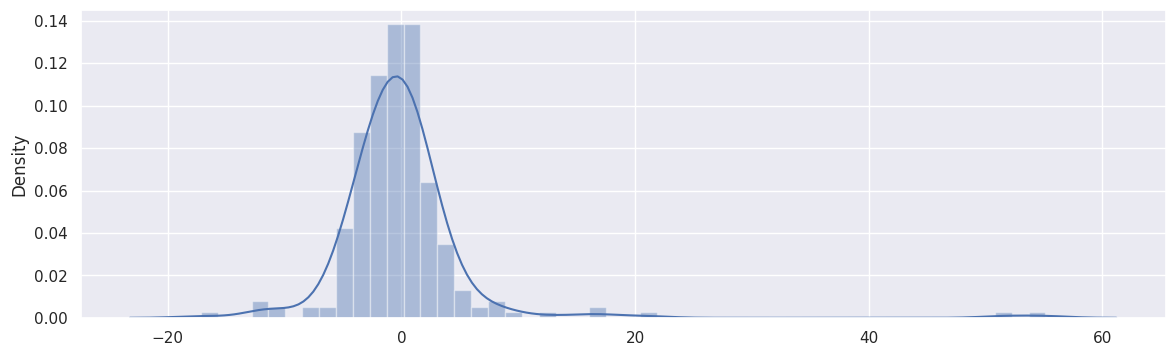

In [26]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals, hist=True, kde=True)

In [27]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals))

[1.97630273]


In [28]:
#absolute value because we're not descriminating from being over or under on a prediction.
absresiduals = abs(residuals)
print(np.mean(abs(residuals)))

0    3.054643
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


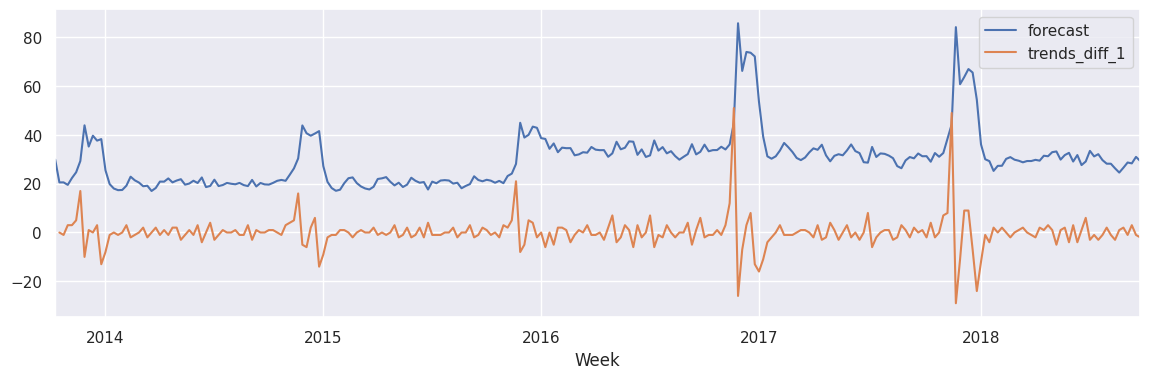

In [29]:
pd.plotting.register_matplotlib_converters()    
ax = model_fit.predict().plot(label="forecast")
googletrends['trends_diff_1'].plot(ax=ax)
ax.legend()

In [39]:
model_fit.aic

1697.0323558171583

**SARIMA**

In [31]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(googletrends["Macy's: (United States)"], order=(3,0,3))
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                  SARIMAX Results                                  
Dep. Variable:     Macy's: (United States)   No. Observations:                  260
Model:                    SARIMAX(3, 0, 3)   Log Likelihood                -862.191
Date:                     Mon, 01 May 2023   AIC                           1738.381
Time:                             03:00:20   BIC                           1763.306
Sample:                         10-13-2013   HQIC                          1748.402
                              - 09-30-2018                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2911      0.065     19.851      0.000       1.164       1.419
ar.L2         -1.2717      0.098    -13.014      0.000      -1.463      -1.080
ar.L3       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
model = sm.tsa.statespace.SARIMAX(googletrends["Macy's: (United States)"], order=(3,0,3),seasonal_order=(1,0,1,4))
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                      SARIMAX Results                                      
Dep. Variable:             Macy's: (United States)   No. Observations:                  260
Model:             SARIMAX(3, 0, 3)x(1, 0, [1], 4)   Log Likelihood                -860.378
Date:                             Mon, 01 May 2023   AIC                           1738.756
Time:                                     03:07:17   BIC                           1770.802
Sample:                                 10-13-2013   HQIC                          1751.639
                                      - 09-30-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3222      0.093     14.168      0.000       1.139       1.505
ar.L2         -1.2960      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
model = sm.tsa.statespace.SARIMAX(googletrends["Macy's: (United States)"], trend='t', seasonal_order=(1,0,1,4))
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:             Macy's: (United States)   No. Observations:                  260
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 4)   Log Likelihood                -852.094
Date:                             Mon, 01 May 2023   AIC                           1714.187
Time:                                     03:08:51   BIC                           1731.991
Sample:                                 10-13-2013   HQIC                          1721.344
                                      - 09-30-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0015      0.002      0.715      0.475      -0.003       0.005
ar.L1          0.8660      

In [37]:
model = sm.tsa.statespace.SARIMAX(googletrends["Macy's: (United States)"], trend='t', order=(3,0,3), seasonal_order=(1,0,0,4))
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:            Macy's: (United States)   No. Observations:                  260
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -853.594
Date:                            Mon, 01 May 2023   AIC                           1725.188
Time:                                    03:13:06   BIC                           1757.234
Sample:                                10-13-2013   HQIC                          1738.071
                                     - 09-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0188      0.034      0.559      0.576      -0.047       0.085
ar.L1         -0.0705      0.066   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<ipython-input-38-7cea896a7046>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, hist=True, kde=True)


<Axes: ylabel='Density'>

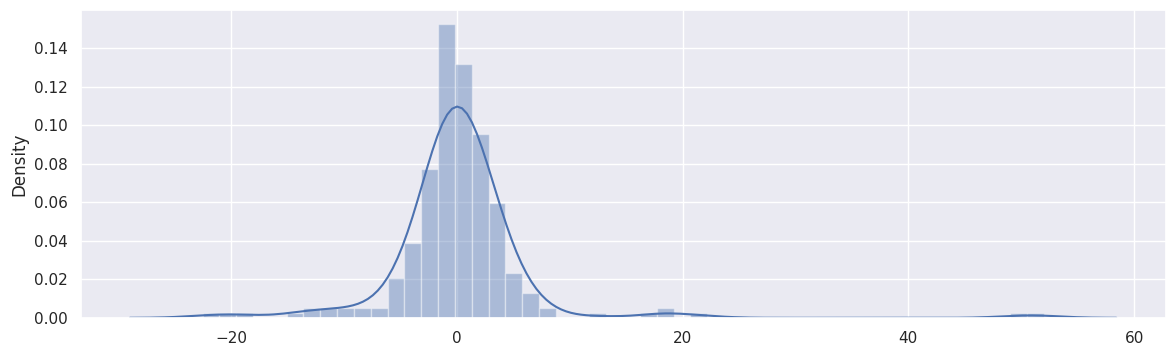

In [38]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals, hist=True, kde=True)

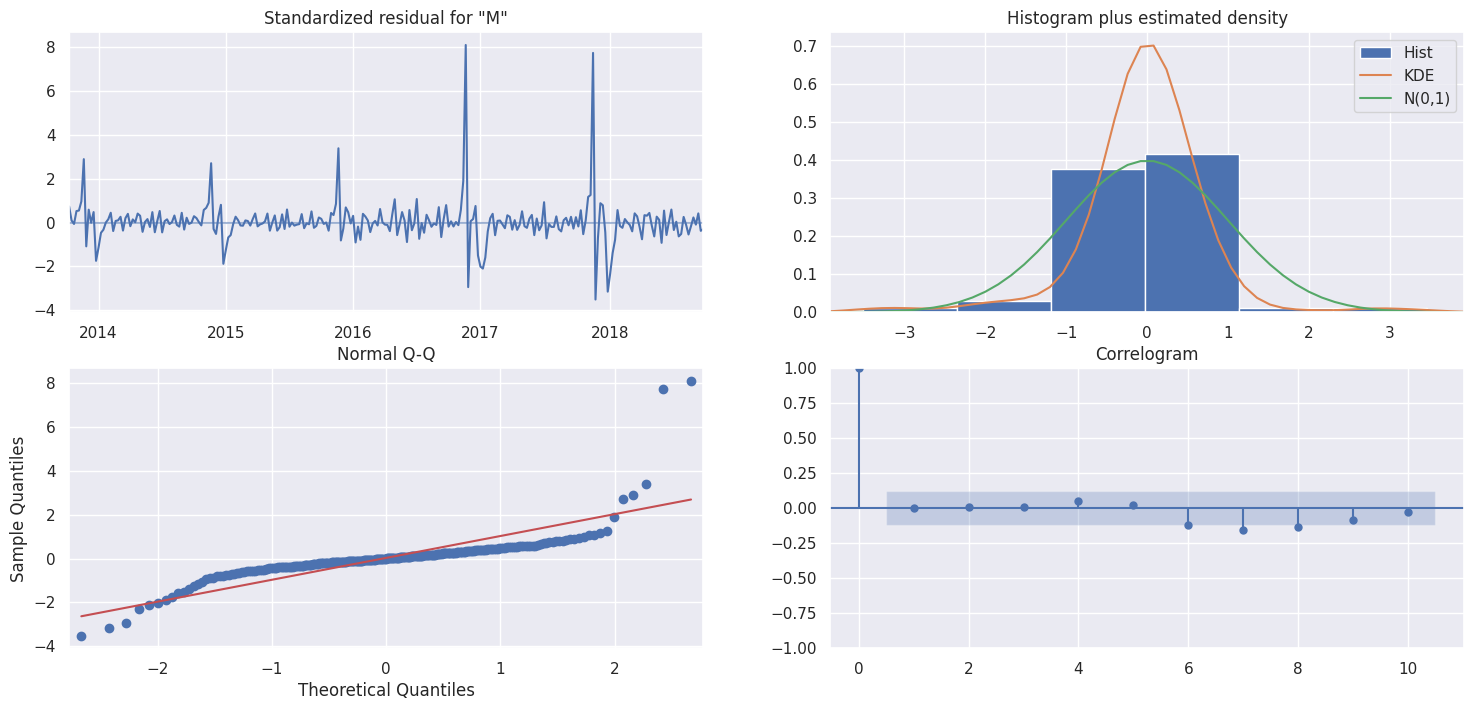

In [39]:
model_fit.plot_diagnostics(figsize=(18, 8))
plt.show()

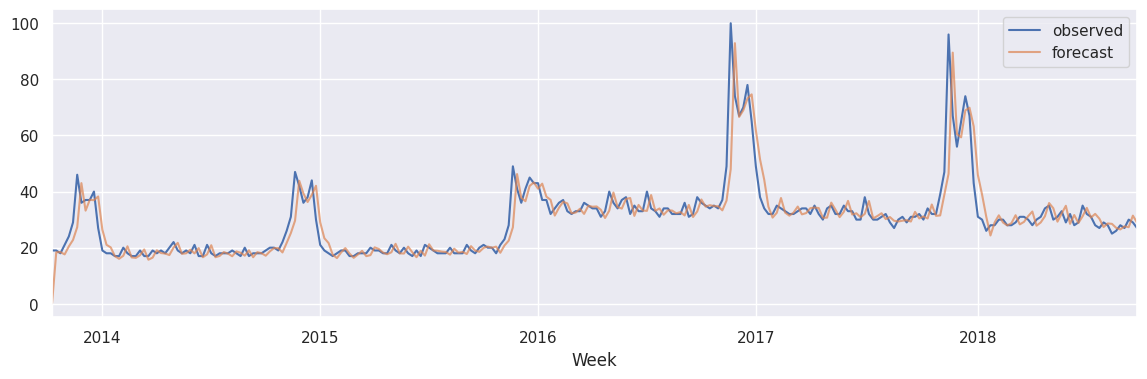

In [40]:
pred = model_fit.get_prediction()
pred_ci = model_fit.conf_int()
ax = googletrends["Macy's: (United States)"].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7, figsize=(14, 4))
plt.legend()
plt.show()


In [41]:
fcast = model_fit.predict(len(googletrends["Macy's: (United States)"]),len(googletrends["Macy's: (United States)"])+52)

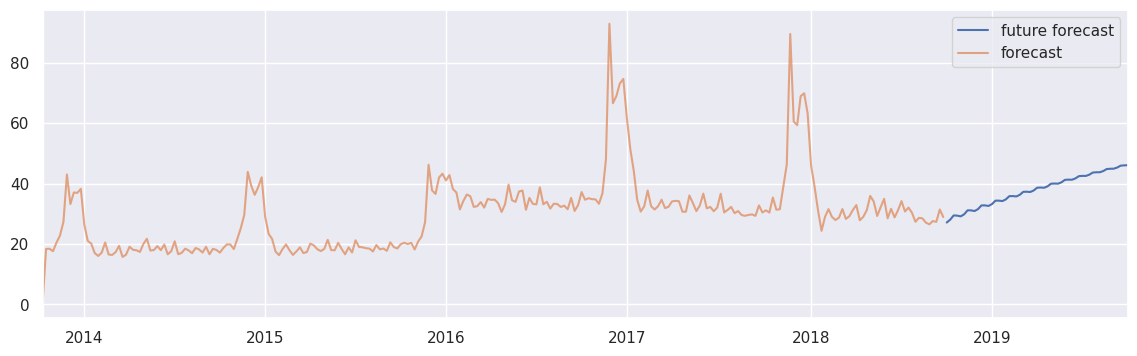

In [42]:
ax = fcast.plot(label='future forecast')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7, figsize=(14, 4))
plt.legend()
plt.show()


In [43]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2013-10-13     0.187633
2013-10-20    18.371879
2013-10-27    18.420796
2013-11-03    17.604346
2013-11-10    20.446305
2013-11-17    22.759621
2013-11-24    27.310610
2013-12-01    43.007288
2013-12-08    33.204067
2013-12-15    37.057310
2013-12-22    36.920682
2013-12-29    38.247731
Freq: W-SUN, Name: predicted_mean, dtype: float64

**SARIMAX**

In [44]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [45]:
adspend = pd.read_csv('macys.adspend.csv')

In [46]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"WEEK OF OCT 07, 2013 (B)",Go Red For Women/Macys & Merck : Sponsored Event,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"WEEK OF OCT 07, 2013 (B)",Go Red For Women/Macys : Sponsored Event,0.3,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"WEEK OF OCT 07, 2013 (B)",Macys : Fragrances & Cosmetics,1530.2,0.0,0.0,0.0,0.0,0.0,0.0,106.7,1423.5,0.0,0.0,0.0
3,"WEEK OF OCT 07, 2013 (B)",Macys : Furniture & Home Decor,225.6,0.0,0.0,0.0,0.0,0.0,0.0,10.6,215.0,0.0,0.0,0.0
4,"WEEK OF OCT 07, 2013 (B)",Macys : Furniture & Home Decor & Mattresses,59.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.9,0.0,0.0,0.0


In [47]:
adspend.columns

Index(['TIME PERIOD', 'PRODUCT', 'TOTAL DOLS (000)', 'NETWORK TV DOLS (000)',
       'CABLE TV DOLS (000)', 'SYNDICATION DOLS (000)', 'SPOT TV DOLS (000)',
       'MAGAZINES DOLS (000)', 'SUNDAY MAGS DOLS (000)',
       'NATL NEWSP DOLS (000)', 'NEWSPAPER DOLS (000)',
       'NETWORK RADIO DOLS (000)', 'NAT SPOT RADIO DOLS (000)',
       'OUTDOOR DOLS (000)'],
      dtype='object')

In [48]:
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("WEEK OF ", "")
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("\(B\)", "") #\escape character
adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "") #\escape character
adspend['FIXED TIME'] = pd.to_datetime(adspend['TIME PERIOD'])
adspendnoproducts=adspend.pivot_table(index='FIXED TIME', aggfunc=np.sum)

<ipython-input-48-e5bf7690c187>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("\(B\)", "") #\escape character
<ipython-input-48-e5bf7690c187>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "") #\escape character
<ipython-input-48-e5bf7690c187>:5: FutureWarning: The operation <function sum at 0x7f4085f13d00> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  adspendnoproducts=adspend.pivot_table(index='FIXED TIME', aggfunc=np.sum)


In [49]:
adspendnoproducts

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL
FIXED TIME,,,,,,,,,,,,
2013-10-07,920.3,194.5,116.7,334.9,485.9,3880.9,5296.4,0.0,117.7,0.0,364.2,11711.7
2013-10-14,1376.9,194.5,116.7,439.0,485.9,3394.9,3756.4,0.0,44.6,0.0,138.5,9947.5
2013-10-21,1599.4,176.8,116.7,260.3,485.9,3465.8,6269.9,0.0,234.5,0.0,750.9,13360.4
2013-10-28,732.5,6425.8,181.5,925.7,495.0,1853.7,6875.8,364.3,157.8,235.6,174.3,18422.0
2013-11-04,1962.0,194.5,267.8,1328.3,507.0,4011.5,7087.7,0.0,205.2,0.0,685.1,16249.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-03,1027.0,0.0,386.9,32.9,515.8,2105.2,93.2,0.0,18.0,0.0,724.6,4903.5
2018-09-10,1750.4,0.0,386.9,44.9,515.8,2708.4,311.9,0.0,54.4,0.0,1141.8,6914.4
2018-09-17,1276.0,0.0,386.9,17.3,515.8,1861.6,56.9,0.0,79.3,0.0,853.5,5047.3


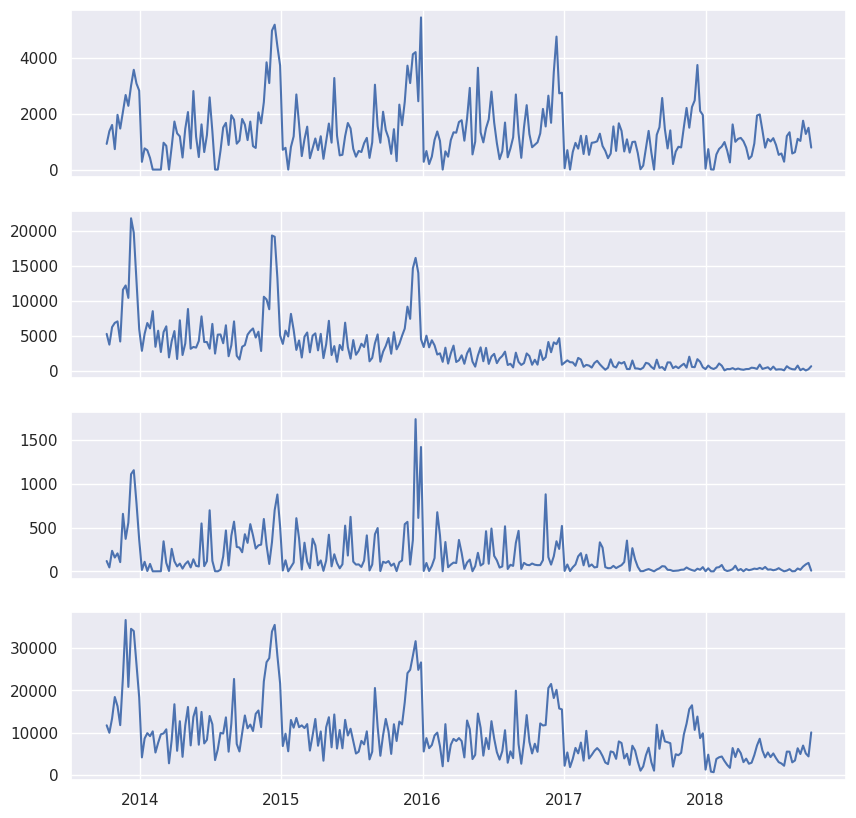

In [50]:
dimensions = (10, 10)
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize=dimensions, sharex='all') # have the one x axis printed for all 4 graphs instead of for each graph

ax1.plot(adspendnoproducts.index, adspendnoproducts['CABLE TV'])
ax2.plot(adspendnoproducts.index, adspendnoproducts['NEWSPAPER'])
ax3.plot(adspendnoproducts.index, adspendnoproducts['SPOT TV']) #Spot cable is one of two basic ways to buy advertising on cable television. It allows regional small-business owners to show their TV ads on national cable networks that air in their local markets without having to buy airtime from those networks.
ax4.plot(adspendnoproducts.index, adspendnoproducts['TOTAL'])

In [52]:
googletrends.head()

,Macy's: (United States),trends_diff_1
Week,,
2013-10-13,19,NaN
2013-10-20,19,0.0
2013-10-27,18,-1.0
2013-11-03,21,3.0
2013-11-10,24,3.0


In [53]:
adspendnoproducts['FIXED DATE'] = adspendnoproducts.index - pd.DateOffset(1)

In [54]:
adspendnoproducts['FIXED DATE']

FIXED TIME
2013-10-07   2013-10-06
2013-10-14   2013-10-13
2013-10-21   2013-10-20
2013-10-28   2013-10-27
2013-11-04   2013-11-03
                ...    
2018-09-03   2018-09-02
2018-09-10   2018-09-09
2018-09-17   2018-09-16
2018-09-24   2018-09-23
2018-10-01   2018-09-30
Name: FIXED DATE, Length: 261, dtype: datetime64[ns]

In [55]:
adspendnoproducts.index = adspendnoproducts['FIXED DATE']
del adspendnoproducts['FIXED DATE']
adspendnoproducts

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL
FIXED DATE,,,,,,,,,,,,
2013-10-06,920.3,194.5,116.7,334.9,485.9,3880.9,5296.4,0.0,117.7,0.0,364.2,11711.7
2013-10-13,1376.9,194.5,116.7,439.0,485.9,3394.9,3756.4,0.0,44.6,0.0,138.5,9947.5
2013-10-20,1599.4,176.8,116.7,260.3,485.9,3465.8,6269.9,0.0,234.5,0.0,750.9,13360.4
2013-10-27,732.5,6425.8,181.5,925.7,495.0,1853.7,6875.8,364.3,157.8,235.6,174.3,18422.0
2013-11-03,1962.0,194.5,267.8,1328.3,507.0,4011.5,7087.7,0.0,205.2,0.0,685.1,16249.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-02,1027.0,0.0,386.9,32.9,515.8,2105.2,93.2,0.0,18.0,0.0,724.6,4903.5
2018-09-09,1750.4,0.0,386.9,44.9,515.8,2708.4,311.9,0.0,54.4,0.0,1141.8,6914.4
2018-09-16,1276.0,0.0,386.9,17.3,515.8,1861.6,56.9,0.0,79.3,0.0,853.5,5047.3


In [56]:
googletrends['TOTAL ADSPEND'] = adspendnoproducts['TOTAL']

In [57]:
googletrends

,Macy's: (United States),trends_diff_1,TOTAL ADSPEND
Week,,,
2013-10-13,19,NaN,9947.5
2013-10-20,19,0.0,13360.4
2013-10-27,18,-1.0,18422.0
2013-11-03,21,3.0,16249.1
2013-11-10,24,3.0,11750.9
...,...,...,...
2018-09-02,28,2.0,4903.5
2018-09-09,27,-1.0,6914.4
2018-09-16,30,3.0,5047.3


In [62]:
googletrends_droplastrow = googletrends[:-1]
model = sm.tsa.statespace.SARIMAX(googletrends_droplastrow["Macy's: (United States)"], trend='t', order=(1,0,0), exog = googletrends_droplastrow['TOTAL ADSPEND'])
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     Macy's: (United States)   No. Observations:                  259
Model:                    SARIMAX(1, 0, 0)   Log Likelihood                -850.833
Date:                     Mon, 01 May 2023   AIC                           1709.666
Time:                             04:05:27   BIC                           1723.893
Sample:                         10-13-2013   HQIC                          1715.386
                              - 09-23-2018                                         
Covariance Type:                       opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
drift             0.0015      0.005      0.274      0.784      -0.009       0.012
TOTAL ADSPEND     0.0003   8.38e-05      4.125      0.000       0.000       0.001
